# Imports and data

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving fifa_cleaned.csv to fifa_cleaned.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
data = pd.read_csv("fifa_cleaned.csv")
print(data.info)
data.columns

<bound method DataFrame.info of            id            name  ...   RCB    RB
0      158023        L. Messi  ...  48+2  59+2
1      190460      C. Eriksen  ...  57+3  66+3
2      195864        P. Pogba  ...  72+3  74+3
3      198219      L. Insigne  ...  44+3  58+3
4      201024    K. Koulibaly  ...  85+3  76+3
...       ...             ...  ...   ...   ...
17949  204322     R. McKenzie  ...  46+2  50+2
17950  239762       M. Sipľak  ...  58+2  57+2
17951  235155      J. Bekkema  ...   NaN   NaN
17952  244883      A. Al Yami  ...  32+2  39+2
17953  247187  Júnior Brumado  ...  40+2  40+2

[17954 rows x 92 columns]>


Index(['id', 'name', 'full_name', 'birth_date', 'age', 'height_cm',
       'weight_kgs', 'positions', 'nationality', 'overall_rating', 'potential',
       'value_euro', 'wage_euro', 'preferred_foot',
       'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
       'work_rate', 'body_type', 'release_clause_euro', 'club_team',
       'club_rating', 'club_position', 'club_jersey_number', 'club_join_date',
       'contract_end_year', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle',
  

# Drop unusual columns and adjusting

In [ ]:
df = data.drop(data.columns[[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,57,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91]],axis=1)
df

,positions,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,sliding_tackle
0,"CF,RW,ST",86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,26
1,"CAM,RM,CM",88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,22
2,"CM,CAM",80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67
3,"LW,ST",86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,22
4,CB,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,"RM,CAM,CM",57,61,60,66,37,64,53,47,61,66,83,86,93,63,82,51,77,75,64,54,69,41,60,64,63,56,40,18
17950,LB,50,19,53,55,31,52,26,28,43,53,70,64,54,50,53,27,74,66,70,22,62,55,42,39,32,52,53,60
17951,GK,11,9,13,26,9,12,13,12,24,18,27,22,29,48,38,17,43,25,63,9,27,10,5,25,16,47,9,13
17952,"ST,LM",42,60,55,49,49,57,47,39,37,56,84,86,65,53,73,56,58,58,49,58,38,15,54,52,50,53,16,17


In [ ]:
index = 0
for i in df.iterrows():
  arifk = i[1][0].split(',')
  if arifk[0] == 'CB' or arifk[0] == 'RB' or arifk[0] == 'RWB' or  arifk[0] == 'LB'  or arifk[0] == 'LWB':
    df.at[index,'positions'] = 'DEF'
  elif arifk[0] == 'CDM' or arifk[0] == 'CM' or arifk[0] == 'RM' or  arifk[0] == 'LM'  or arifk[0] == 'CAM':
    df.at[index,'positions'] = 'MID'
  elif arifk[0] == 'RF' or arifk[0] == 'LF' or arifk[0] == 'CF' or  arifk[0] == 'ST'  or arifk[0] == 'RW' or arifk[0] == 'LW' :
    df.at[index,'positions'] = 'ATT'
  index = index + 1
df 

,positions,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,sliding_tackle
0,ATT,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,26
1,MID,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,22
2,MID,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67
3,ATT,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,22
4,DEF,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,MID,57,61,60,66,37,64,53,47,61,66,83,86,93,63,82,51,77,75,64,54,69,41,60,64,63,56,40,18
17950,DEF,50,19,53,55,31,52,26,28,43,53,70,64,54,50,53,27,74,66,70,22,62,55,42,39,32,52,53,60
17951,GK,11,9,13,26,9,12,13,12,24,18,27,22,29,48,38,17,43,25,63,9,27,10,5,25,16,47,9,13
17952,ATT,42,60,55,49,49,57,47,39,37,56,84,86,65,53,73,56,58,58,49,58,38,15,54,52,50,53,16,17


In [ ]:
egemen = df.copy()
df.drop(df.loc[df['positions'] == "GK"].index,axis=0 ,inplace=True)
df.dropna()

,positions,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,sliding_tackle
0,ATT,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,26
1,MID,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,22
2,MID,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67
3,ATT,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,22
4,DEF,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17948,MID,68,57,52,64,57,68,70,68,61,65,81,81,91,53,89,70,71,65,34,65,45,32,55,72,64,62,51,17
17949,MID,57,61,60,66,37,64,53,47,61,66,83,86,93,63,82,51,77,75,64,54,69,41,60,64,63,56,40,18
17950,DEF,50,19,53,55,31,52,26,28,43,53,70,64,54,50,53,27,74,66,70,22,62,55,42,39,32,52,53,60
17952,ATT,42,60,55,49,49,57,47,39,37,56,84,86,65,53,73,56,58,58,49,58,38,15,54,52,50,53,16,17


# Visualization of data

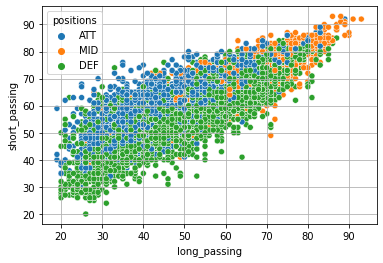

In [ ]:

sns.scatterplot(data = df,x = "long_passing", y = "short_passing", hue = "positions").grid()

In [ ]:
for column in df.columns[1:29]:
    sns.scatterplot(data = df,x = column, y = 'jumping', hue = "positions").grid()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Splitting dataframe 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
target = df.iloc[:,0:1]
features = df.iloc[:,1:]
features

,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,sliding_tackle
0,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,26
1,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,22
2,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67
3,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,22
4,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17948,68,57,52,64,57,68,70,68,61,65,81,81,91,53,89,70,71,65,34,65,45,32,55,72,64,62,51,17
17949,57,61,60,66,37,64,53,47,61,66,83,86,93,63,82,51,77,75,64,54,69,41,60,64,63,56,40,18
17950,50,19,53,55,31,52,26,28,43,53,70,64,54,50,53,27,74,66,70,22,62,55,42,39,32,52,53,60
17952,42,60,55,49,49,57,47,39,37,56,84,86,65,53,73,56,58,58,49,58,38,15,54,52,50,53,16,17


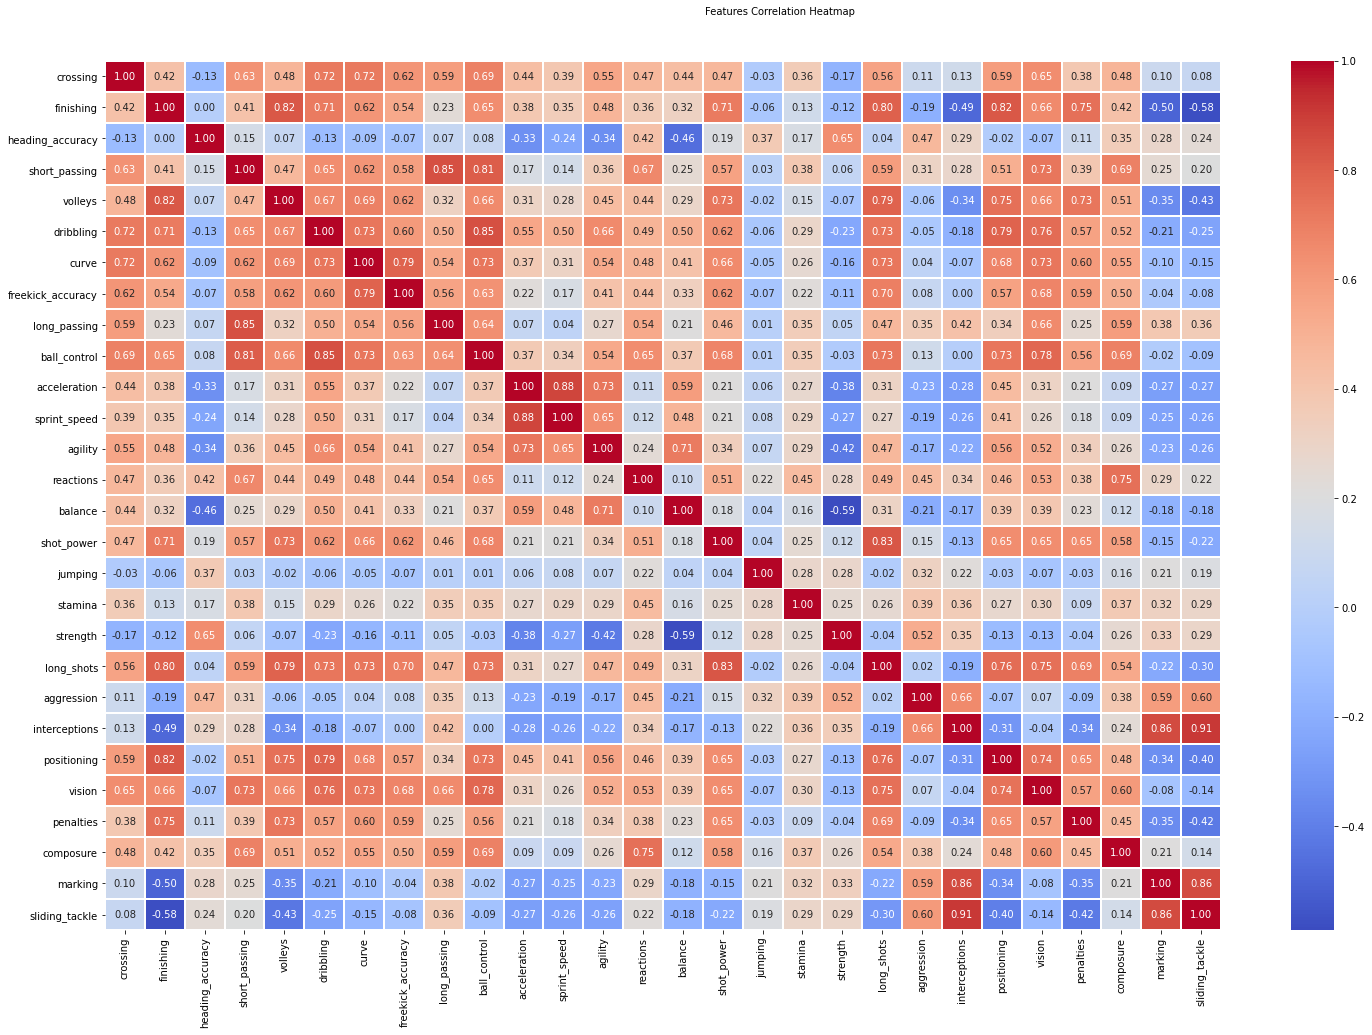

In [ ]:
f, ax = plt.subplots(figsize=(25, 15))
corr = features.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=1)
f.subplots_adjust(top=0.93)
t= f.suptitle('Features Correlation Heatmap', fontsize=10)

# Prepare target dataframe

In [ ]:
data = {
    'DEF' : [],
    'MID' : [],
    'ATT' : []
}
target_frame = pd.DataFrame(data)
target_frame

,DEF,MID,ATT


In [ ]:
confusion_target = []
for row in target.iterrows():
  if row[1][0] == 'DEF':
    list = {'DEF':1, 'MID':0, 'ATT':0}
    target_frame = target_frame.append(list, ignore_index=True)
    confusion_target.append(0)
  elif row[1][0] == 'MID':
    list = {'DEF':0, 'MID':1, 'ATT':0}
    target_frame = target_frame.append(list, ignore_index=True)
    confusion_target.append(1)
  else :
    list = {'DEF':0, 'MID':0, 'ATT':1}
    target_frame = target_frame.append(list, ignore_index=True)
    confusion_target.append(2)

print(confusion_target)

[2, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 1, 2, 1, 0, 2, 0, 0, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 0, 1, 0, 0, 1, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 1, 1, 0, 1, 1, 1, 2, 0, 2, 2, 1, 0, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 0, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1, 0, 0, 1, 2, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1, 2, 1, 0, 0, 0, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2, 0, 2, 0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1, 

In [ ]:
target_frame[target_frame['DEF']==1.0].count()

DEF    5883
MID    5883
ATT    5883
dtype: int64

# Data for training

In [ ]:
 feature_train, feature_test, target_train, target_test = train_test_split(features,target_frame , test_size=0.2, random_state=42)

In [ ]:
target_test

,DEF,MID,ATT
10217,0.0,1.0,0.0
13687,1.0,0.0,0.0
10731,1.0,0.0,0.0
12108,0.0,1.0,0.0
5129,0.0,0.0,1.0
...,...,...,...
4400,1.0,0.0,0.0
724,1.0,0.0,0.0
14021,1.0,0.0,0.0
4031,0.0,1.0,0.0


In [ ]:
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if(logs.get('accuracy')>0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

In [ ]:
callbacks = myCallBack()

# Train and predictions

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import StratifiedKFold

In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cvscores = []

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Passing a list of layers to the constructor
model = Sequential([
    Dense(28, activation='relu', input_shape=(28,)),
    Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax'),
])
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_72 (Dense)             (None, 20)                580       
_________________________________________________________________
dense_73 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_74 (Dense)             (None, 3)                 33        
Total params: 1,635
Trainable params: 1,635
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam', #adam
    loss='categorical_crossentropy', #
    metrics=['accuracy']
)

In [ ]:
history = model.fit(feature_train, target_train,
                    batch_size= 64,
                    epochs= 100,
                    callbacks=[callbacks]
                   )

Epoch 1/100
199/199 [==============================] - 0s 1ms/step - loss: 1.4886 - accuracy: 0.7130
Epoch 2/100
199/199 [==============================] - 0s 1ms/step - loss: 0.4914 - accuracy: 0.7954
Epoch 3/100
199/199 [==============================] - 0s 1ms/step - loss: 0.4272 - accuracy: 0.8146
Epoch 4/100
199/199 [==============================] - 0s 1ms/step - loss: 0.3902 - accuracy: 0.8338
Epoch 5/100
199/199 [==============================] - 0s 1ms/step - loss: 0.3656 - accuracy: 0.8460
Epoch 6/100
199/199 [==============================] - 0s 1ms/step - loss: 0.3518 - accuracy: 0.8520
Epoch 7/100
199/199 [==============================] - 0s 1ms/step - loss: 0.3335 - accuracy: 0.8597
Epoch 8/100
199/199 [==============================] - 0s 1ms/step - loss: 0.3350 - accuracy: 0.8560
Epoch 9/100
199/199 [==============================] - 0s 1ms/step - loss: 0.3228 - accuracy: 0.8644
Epoch 10/100
199/199 [==============================] - 0s 1ms/step - loss: 0.3177 - accura

In [ ]:
results = model.evaluate(feature_test, target_test)

100/100 [==============================] - 0s 862us/step - loss: 0.2681 - accuracy: 0.8905


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_target = []
for row in target_test.iterrows():
  if row[1][0] == 1.0:
    confusion_target.append(0)
  elif row[1][1] == 1.0:
    confusion_target.append(1)
  else :
    confusion_target.append(2)

In [ ]:
X = [[73,74,67,84,62,82,73,58,82,83,79,88,75,84,69,75,66,86,81,74,83,82,82,80,64,82,79,80,74],[71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,35,42,19],
     [5,55,1,70,10,30,30,20,75,50,30,32,20,60,23,10,2,50,35,10,60,45,76,75,75,70,47,22,1],
     [50,20,60,70,35,65,30,25,65,55,75,72,60,85,65,30,75,60,50,20,80,65,20,80,80,85,55,70,90],
     [65,90,15,90,50,85,70,60,80,80,95,88,70,70,80,65,85,95,70,65,65,75,92,70,90,70,30,10,18],
     [80,60,80,90,50,86,70,60,80,85,60,85,50,80,60,55,85,85,50,75,60,30,90,65,50,70,30,20,30]
     ]
ynew = model.predict_classes(feature_test)
pd.DataFrame(target_test).to_numpy()
#matrix = confusion_matrix(confusion_target.argmax(axis=1), ynew.argmax(axis=1))
con_mat = tf.math.confusion_matrix(labels=confusion_target, predictions=ynew).numpy()
con_mat


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[1195,   14,    0],
       [ 238, 1041,   75],
       [   9,  109,  497]], dtype=int32)